## Zadanie: baza filmów

1) Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.
2) Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi.
3) Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.
4) Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?
5) Filmy, którego gatunku trwają średnio najdłużej (runtime)?
6) Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

Zadanie 1: 10 najwyżej ocenianych filmów (vote_count > 3. kwartyl):
                         title  vote_average  vote_count
1881  The Shawshank Redemption           8.5        8205
3337             The Godfather           8.4        5893
2294             Spirited Away           8.3        3840
3865                  Whiplash           8.3        4254
2731    The Godfather: Part II           8.3        3338
3232              Pulp Fiction           8.3        8428
1818          Schindler's List           8.3        4329
662                 Fight Club           8.3        9413
2170                    Psycho           8.2        2320
1847                GoodFellas           8.2        3128


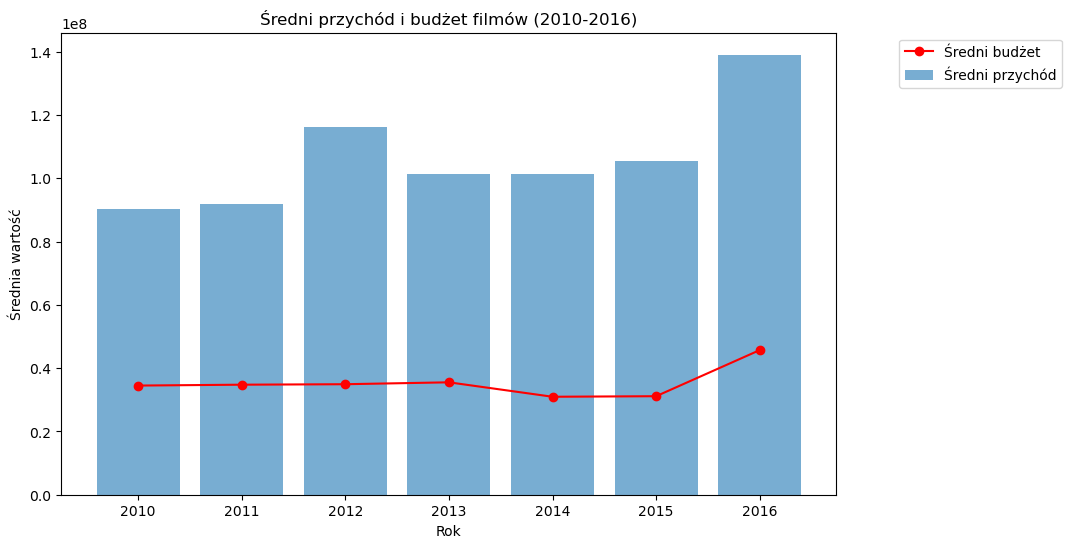


Zadanie 3: Połączenie baz filmów i gatunków:
                                      title     genres
0                                    Avatar     Action
1  Pirates of the Caribbean: At World's End  Adventure
2                                   Spectre     Action
3                     The Dark Knight Rises     Action
4                               John Carter     Action

Zadanie 4.1: Najczęściej występujący gatunek:
Drama (liczba filmów: 1207)

Zadanie 4.2: Najrzadziej występujący gatunek:
Foreign (liczba filmów: 2)

Zadanie 5: Gatunek z najdłuższym średnim czasem trwania:
History (średni czas: 133.96 minut)


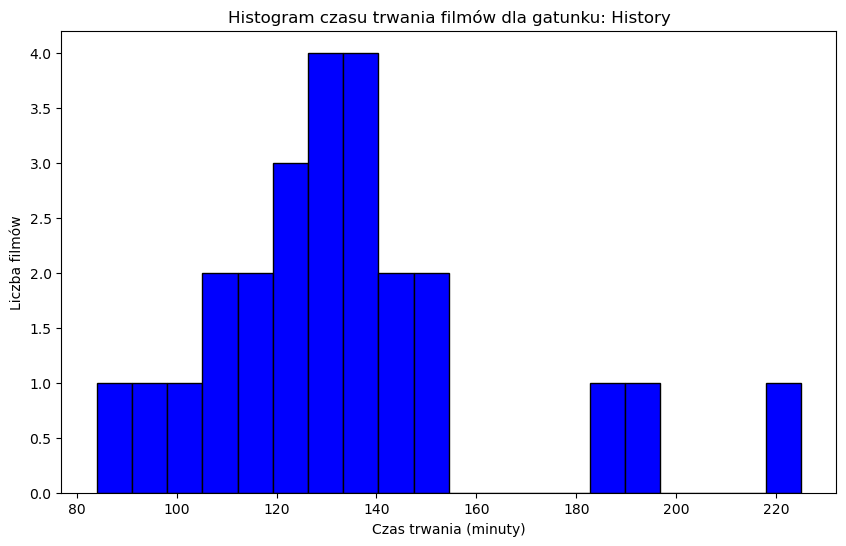

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych z plików CSV
movies_df = pd.read_csv('tmdb_movies.csv')
genres_df = pd.read_csv('tmdb_genres.csv')

# Zadanie 1: Lista 10 najwyżej ocenianych filmów
# Obliczenie 3. kwartyla liczby głosów
q3 = movies_df['vote_count'].quantile(0.75)

# Filtracja filmów z liczbą głosów większą niż 3. kwartyl
filtered_movies = movies_df[movies_df['vote_count'] > q3]

# Sortowanie filmów według oceny i wybór 10 najlepszych
top_10_movies = filtered_movies.sort_values(by='vote_average', ascending=False).head(10)

# Wyświetlenie wyników
print("Zadanie 1: 10 najwyżej ocenianych filmów (vote_count > 3. kwartyl):")
print(top_10_movies[['title', 'vote_average', 'vote_count']])

# Zadanie 2: Średni przychód i budżet w latach 2010-2016
# Usunięcie wierszy z brakującymi wartościami w kolumnie 'release_date'
movies_df_cleaned = movies_df.dropna(subset=['release_date'])

# Filtracja filmów z lat 2010-2016
movies_2010_2016 = movies_df_cleaned[
    (movies_df_cleaned['release_date'].str[:4].astype(int) >= 2010) & 
    (movies_df_cleaned['release_date'].str[:4].astype(int) <= 2016)
]

# Grupowanie według roku i obliczenie średnich
yearly_stats = movies_2010_2016.groupby(movies_2010_2016['release_date'].str[:4]).agg({
    'revenue': 'mean',
    'budget': 'mean'
}).reset_index()

# Tworzenie wykresu
plt.figure(figsize=(10, 6))
plt.bar(yearly_stats['release_date'], yearly_stats['revenue'], label='Średni przychód', alpha=0.6)
plt.plot(yearly_stats['release_date'], yearly_stats['budget'], label='Średni budżet', color='red', marker='o')

# Formatowanie osi i dodanie tytułu
plt.xlabel('Rok')
plt.ylabel('Średnia wartość')
plt.title('Średni przychód i budżet filmów (2010-2016)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Wyświetlenie wykresu
plt.show()

# Zadanie 3: Połączenie baz filmów i gatunków
# Konwersja kolumny 'genre_id' na typ int (usuwając wartości NaN)
movies_df['genre_id'] = movies_df['genre_id'].fillna(-1).astype(int)

# Zmiana nazwy kolumny 'Unnamed: 0' na 'genre_id' w genres_df
genres_df.rename(columns={'Unnamed: 0': 'genre_id'}, inplace=True)

# Połączenie tabel na podstawie genre_id
merged_df = pd.merge(movies_df, genres_df, left_on='genre_id', right_on='genre_id', how='left')

# Wyświetlenie przykładowych wyników
print("\nZadanie 3: Połączenie baz filmów i gatunków:")
print(merged_df[['title', 'genres']].head())

# Zadanie 4: Najczęściej i najrzadziej występujący gatunek
# Usunięcie wierszy z brakującymi wartościami w kolumnie 'genres'
merged_df_cleaned = merged_df.dropna(subset=['genres'])

# Zliczenie liczby filmów w każdym gatunku
genre_counts = merged_df_cleaned['genres'].value_counts()

# Najczęściej występujący gatunek
most_common_genre = genre_counts.idxmax()
count_most_common_genre = genre_counts.max()

# Najrzadziej występujący gatunek
least_common_genre = genre_counts.idxmin()
count_least_common_genre = genre_counts.min()

print("\nZadanie 4.1: Najczęściej występujący gatunek:")
print(f"{most_common_genre} (liczba filmów: {count_most_common_genre})")

print("\nZadanie 4.2: Najrzadziej występujący gatunek:")
print(f"{least_common_genre} (liczba filmów: {count_least_common_genre})")

# Zadanie 5: Gatunek z najdłuższym średnim czasem trwania
# Obliczenie średniego czasu trwania filmów dla każdego gatunku
avg_runtime_by_genre = merged_df_cleaned.groupby('genres')['runtime'].mean()

# Gatunek z najdłuższym średnim czasem trwania
longest_runtime_genre = avg_runtime_by_genre.idxmax()
longest_runtime = avg_runtime_by_genre.max()

print("\nZadanie 5: Gatunek z najdłuższym średnim czasem trwania:")
print(f"{longest_runtime_genre} (średni czas: {longest_runtime:.2f} minut)")

# Zadanie 6: Histogram czasu trwania filmów dla gatunku z najdłuższym średnim czasem
# Filtracja filmów dla gatunku z najdłuższym średnim czasem trwania
longest_genre_movies = merged_df_cleaned[merged_df_cleaned['genres'] == longest_runtime_genre]

# Usunięcie wierszy z brakującymi wartościami w kolumnie 'runtime'
longest_genre_movies = longest_genre_movies.dropna(subset=['runtime'])

# Tworzenie histogramu
plt.figure(figsize=(10, 6))
plt.hist(longest_genre_movies['runtime'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Czas trwania (minuty)')
plt.ylabel('Liczba filmów')
plt.title(f'Histogram czasu trwania filmów dla gatunku: {longest_runtime_genre}')
plt.show()